In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from IPython.display import Image

In [2]:
iris = pd.read_csv('../../datasets/iris.csv')
iris.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Train - Test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split( iris.iloc[:,:4], iris.iloc[:,4], test_size = 0.3, 
                                                   random_state = 42)

In [4]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Visualization
If graphviz is not installed then paste the generated graph in http://webgraphviz.com/ to visualize it.  

In [5]:
dotfile = open("D:/classifier.dot", 'w')
export_graphviz(model, out_file = dotfile, feature_names = iris.columns[:4])
dotfile.close()

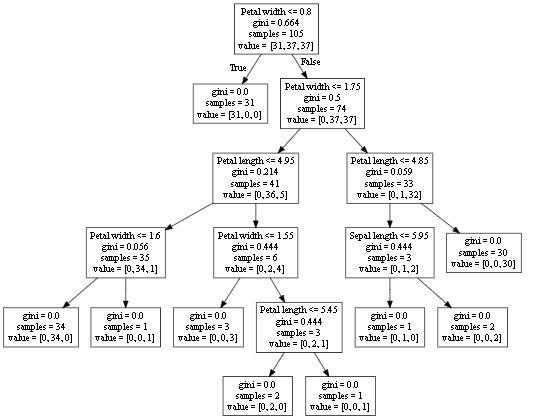

In [6]:
Image(filename='D:/classifier_image.PNG')

### Prediction and accuracy

Train accuracy:  100.0


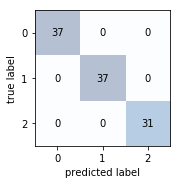

In [7]:
# Train accuracy
est = model.predict(X_train)
cm = metrics.confusion_matrix(y_train, est, labels=pd.unique(y_train))
print('Train accuracy: ', model.score(X_train, y_train) * 100)
plot_confusion_matrix(cm)
plt.show()

Test accuracy:  100.0


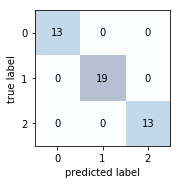

In [8]:
# Test accuracy
est = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, est, labels=pd.unique(y_test))
print('Test accuracy: ', model.score(X_test, y_test) * 100)
plot_confusion_matrix(cm)
plt.show()

### Feature importance

In [9]:
pd.DataFrame(model.feature_importances_*100, index=iris.columns[:4], columns=['which feature plays more imp. role?'])

,which feature plays more imp. role?
Sepal length,1.911002
Sepal width,0.000000
Petal length,55.727376
Petal width,42.361622


## Changing the model parameters 

In [10]:
model_n = DecisionTreeClassifier(criterion='entropy',
                                 max_depth=6, # If None then internal nodes are splitted until 
                                             # leaf nodes have less than min_samples_split samples. 
                                min_samples_split=3, # The minimum number of samples required to split an internal node
                                min_samples_leaf=3,  # The minimum number of samples required to be at a leaf node
                                max_features='auto', # Number of features to be cosidered while splitting 
                                                     # auto = sqrt(n_features)
                               )
model_n.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Train accuracy:  97.14285714285714


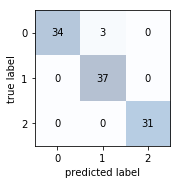

Test accuracy:  97.77777777777777


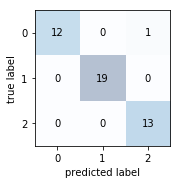

In [11]:
# Train accuracy
est = model_n.predict(X_train)
cm = metrics.confusion_matrix(y_train, est, labels=pd.unique(y_train))
print('Train accuracy: ', model_n.score(X_train, y_train) * 100)
plot_confusion_matrix(cm)
plt.show()

# Test accuracy
est = model_n.predict(X_test)
cm = metrics.confusion_matrix(y_test, est, labels=pd.unique(y_test))
print('Test accuracy: ', model_n.score(X_test, y_test) * 100)
plot_confusion_matrix(cm)
plt.show()

## Finding the best paramters

In [12]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grid = dict(max_depth=range(1, 11, 2), 
                  min_samples_split=range(2,5), 
                  min_samples_leaf=range(2,5))

# Stratified KFold: Built upon KFold. Herem the folds are made by preserving the percentage of samples for each class.
SKold = StratifiedKFold(n_splits=10, shuffle=True) 
grid_search = GridSearchCV(model, param_grid, verbose=1, cv=SKold)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 11, 2), 'min_samples_split': range(2, 5), 'min_samples_leaf': range(2, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Train accuracy:  96.19047619047619


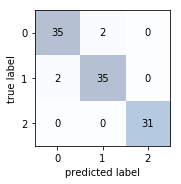

Test accuracy:  100.0


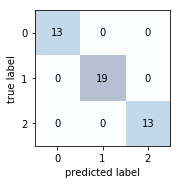

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [13]:
# Train accuracy
est = grid_search.predict(X_train)
cm = metrics.confusion_matrix(y_train, est, labels=pd.unique(y_train))
print('Train accuracy: ', grid_search.score(X_train, y_train) * 100)
plot_confusion_matrix(cm)
plt.show()

# Test accuracy
est = grid_search.predict(X_test)
cm = metrics.confusion_matrix(y_test, est, labels=pd.unique(y_test))
print('Test accuracy: ', grid_search.score(X_test, y_test) * 100)
plot_confusion_matrix(cm)
plt.show()

# Best parameters
grid_search.best_params_